In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
df = pd.read_csv("BTB_dev.csv")

In [28]:
df.head(7)

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,...,0.0,0.0,0.0,59570.000,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,...,0.0,0.0,0.0,59570.000,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,...,4.5,0.0,0.0,60444.379,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,...,257.7,0.0,0.0,60130.453,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,...,-368.8,0.0,0.0,60452.641,0.0,0.0,0.0,0.0,0.0,0.0
5,5,1227,35.6836,-5.3794,1,0.000,0.000,0.000,-9.000,0.020,...,0.0,0.0,0.0,59570.000,2.3,11.6,31.6,240.0,632.4,1187.7
6,6,1598,347.8467,-64.7609,1,0.135,0.182,0.030,39.728,0.019,...,-135.1,0.0,0.0,60628.816,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7848 non-null   int64  
 1   object_id           7848 non-null   int64  
 2   ra                  7848 non-null   float64
 3   decl                7848 non-null   float64
 4   ddf_bool            7848 non-null   int64  
 5   hostgal_specz       7848 non-null   float64
 6   hostgal_photoz      7848 non-null   float64
 7   hostgal_photoz_err  7848 non-null   float64
 8   distmod             7848 non-null   float64
 9   mwebv               7848 non-null   float64
 10  target              7848 non-null   int64  
 11  true_distmod        7848 non-null   float64
 12  true_lensdmu        7848 non-null   float64
 13  true_vpec           7848 non-null   float64
 14  true_rv             7848 non-null   float64
 15  true_av             7848 non-null   float64
 16  true_p

In [30]:
df.describe()

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
count,7848.000000,7.848000e+03,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,...,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000
mean,3923.500000,4.810375e+07,169.719382,-27.254849,0.269623,0.254438,0.357882,0.155699,26.373072,0.081953,...,2.137322,0.474006,0.032735,59946.827096,265.646152,2066.388277,2523.983869,2427.426555,2320.092775,2121.793756
std,2265.666789,4.347364e+07,114.212761,20.248556,0.443792,0.330056,0.545547,0.300364,23.030558,0.150598,...,243.315940,1.115749,0.127110,368.889675,1139.764604,9840.254171,12007.001716,10225.545751,8559.673003,7687.389494
min,0.000000,6.150000e+02,0.175800,-64.760900,0.000000,0.000000,0.000000,0.000000,-9.000000,0.003000,...,-1096.800000,0.000000,0.000000,58220.414000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.750000,3.180865e+05,62.402300,-44.598000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.018000,...,-85.000000,0.000000,0.000000,59570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3923.500000,4.131719e+07,150.996100,-27.279600,0.000000,0.183000,0.210000,0.018000,40.078500,0.032000,...,0.000000,0.000000,0.000000,59875.762000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5885.250000,8.665901e+07,282.875950,-8.838300,1.000000,0.350000,0.431000,0.122250,41.877000,0.076000,...,100.125000,0.000000,0.000000,60265.803000,25.350000,131.550000,287.225000,705.550000,805.000000,694.000000
max,7847.000000,1.307798e+08,359.824200,4.181500,1.000000,3.445000,2.999000,1.735000,47.026000,2.747000,...,1181.600000,3.100000,2.330000,61197.316000,29042.200000,161508.600000,180588.000000,151136.900000,166923.300000,186648.000000


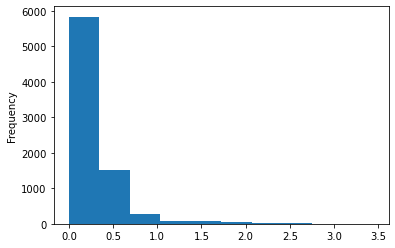

In [31]:
df.hostgal_specz.plot.hist();

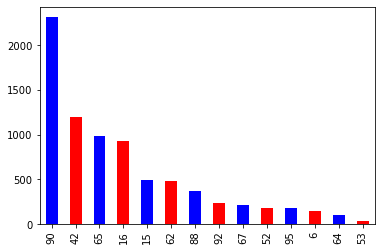

In [32]:
df["target"].value_counts().plot(kind="bar", color=["blue", "red"]);

In [33]:
df.corr()

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
Unnamed: 0,1.000000,0.978479,0.020582,0.058127,-0.768622,-0.065872,-0.022475,-0.023007,-0.049968,0.199187,...,0.003249,0.107721,0.075403,-0.001470,0.014164,0.015446,0.018831,0.024700,0.031985,0.034247
object_id,0.978479,1.000000,0.018335,0.047821,-0.669899,-0.057430,-0.017220,-0.018941,-0.045975,0.171717,...,0.002865,0.096702,0.068480,-0.004721,0.012941,0.013105,0.016135,0.021388,0.028002,0.030415
ra,0.020582,0.018335,1.000000,-0.237186,-0.033685,-0.007064,-0.001593,-0.012704,-0.028158,0.028959,...,-0.008156,0.001122,0.005815,-0.029656,0.011888,0.011850,0.012562,0.014225,0.015162,0.015387
decl,0.058127,0.047821,-0.237186,1.000000,-0.081657,-0.013631,-0.011383,-0.020787,-0.015482,-0.000572,...,0.006353,0.006564,0.003793,-0.040461,0.011045,0.021410,0.018716,0.017270,0.016411,0.012790
ddf_bool,-0.768622,-0.669899,-0.033685,-0.081657,1.000000,0.086622,0.042447,0.027182,0.060243,-0.267189,...,-0.001414,-0.130483,-0.086690,-0.002263,-0.029502,-0.031375,-0.035240,-0.041976,-0.048775,-0.046204
hostgal_specz,-0.065872,-0.057430,-0.007064,-0.013631,0.086622,1.000000,0.550383,0.106985,0.540140,-0.146785,...,-0.002496,0.157505,0.033434,0.197308,-0.102582,-0.150886,-0.152110,-0.169903,-0.191684,-0.191439
hostgal_photoz,-0.022475,-0.017220,-0.001593,-0.011383,0.042447,0.550383,1.000000,0.491069,0.488907,-0.112736,...,-0.021412,0.132511,0.038574,0.219715,-0.106496,-0.131201,-0.131974,-0.147923,-0.167495,-0.168345
hostgal_photoz_err,-0.023007,-0.018941,-0.012704,-0.020787,0.027182,0.106985,0.491069,1.000000,0.358998,-0.084932,...,-0.006360,0.078280,0.043679,0.230621,-0.109892,-0.107368,-0.107581,-0.121159,-0.137780,-0.139743
distmod,-0.049968,-0.045975,-0.028158,-0.015482,0.060243,0.540140,0.488907,0.358998,1.000000,-0.257138,...,0.003706,0.270856,0.159408,0.601512,-0.299668,-0.314542,-0.315709,-0.354963,-0.403250,-0.406890
mwebv,0.199187,0.171717,0.028959,-0.000572,-0.267189,-0.146785,-0.112736,-0.084932,-0.257138,1.000000,...,-0.011993,-0.042151,-0.017806,-0.135193,0.179461,0.150738,0.151716,0.167502,0.189980,0.184294


(23.5, -0.5)

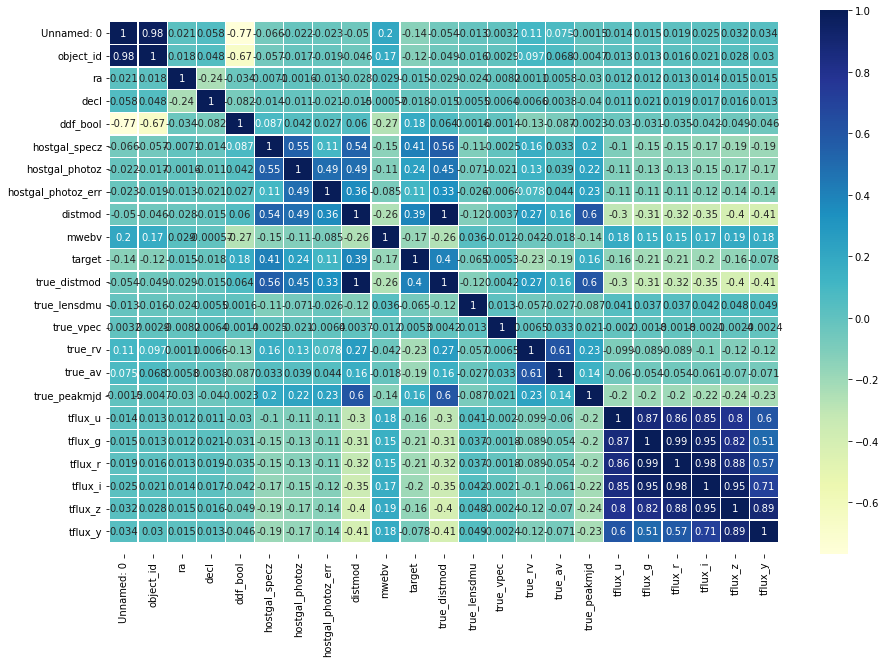

In [34]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.2,
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [42]:
X = df.drop("target", axis=1).drop("object_id", axis=1)
Y = df["target"]

### Oversampling:

In [43]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

### Splitting the data 

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### MinMaxScaling

In [45]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Modelling (Decision Tree, KNN, Random Forest)

In [46]:
models = {"Decision Tree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(7)
    scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores[name] = model.score(X_test, y_test)
    return scores

In [47]:
scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=Y_train,
                             y_test=Y_test)

scores

{'Decision Tree': 0.8507462686567164,
 'KNN': 0.7930005146680391,
 'Random Forest': 0.9059186824498199}

### Best Model: Random Forest (Accuracy= 0.9059)